In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
df = pd.read_csv("ai_job_replacement_skill_shift_100.csv")
df.columns = df.columns.str.strip()

df.head()

,industry,job_role,education_level,experience_years,ai_adoption_level,automation_risk,skill_shift_level,salary_change_percent,job_replacement_probability
0,Logistics,Teacher,Diploma,6,0.639889,0.482573,0.472286,9.168730,0.374303
1,Manufacturing,Software Engineer,Bachelor,16,0.728085,0.802279,1.000000,40.149971,0.700950
2,Education,Software Engineer,Bachelor,19,0.472716,0.440312,0.781299,27.787416,0.227590
3,Logistics,Clerk,Bachelor,3,0.537662,0.778260,1.000000,28.362142,0.697874
4,Finance,Software Engineer,Master,4,0.706455,0.688740,0.758295,17.365126,0.555747


In [4]:
X = df[
    [
        "experience_years",
        "ai_adoption_level",
        "automation_risk",
        "skill_shift_level"
    ]
]

y = df["salary_change_percent"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (80, 4)
Testing set size: (20, 4)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [8]:
y_pred = model.predict(X_test)

In [9]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² Score:", round(r2, 3))
print("Mean Squared Error:", round(mse, 3))
print("Root Mean Squared Error:", round(rmse, 3))

R² Score: 0.926
Mean Squared Error: 12.619
Root Mean Squared Error: 3.552


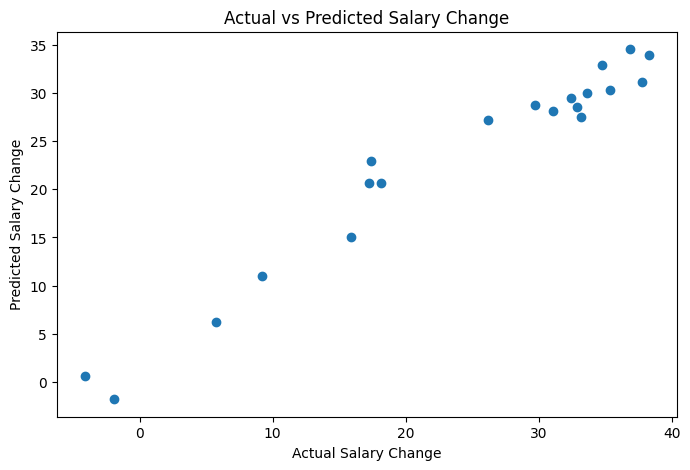

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary Change")
plt.ylabel("Predicted Salary Change")
plt.title("Actual vs Predicted Salary Change")
plt.show()

In [11]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients

,Feature,Coefficient
0,experience_years,0.174304
1,ai_adoption_level,1.918736
2,automation_risk,-1.531010
3,skill_shift_level,43.402080
